# Aproximaciones a Distribuciones Muestrales

Esta establecido que si $Y_1, ..., Y_n$ son variables aleatorias <i>i.i.d</i> normales; la distribución de la media muestral también será normal.

Si $Y_i \sim \mathcal{N}(\mu_Y, \sigma_Y^2)$, entonces. $\bar{Y} \sim \mathcal{N}(\mu_Y, \sigma_Y^2/n)$

Sin embargo,  no es común conocer la distribución de la media muestral. Por esta razón suele recurrirse a distribuciones <i>asintóticas</i>, que es como decir la distribución a la que se aproxima la distribución muestral, cuando $n$ lo suficientemente grande.

Para sustentar esto se cuenta con <i>La Ley de los Grandes Números</i>, que dice: para muestras grandes la media muestral muy cercana a la media poblacional $\bar{Y} \sim \mu_Y$; y el <i>Teorema del Límite Central</i>, según el cual, la distribución muestral del promedio estandarizado se distribuye asintóticamente como una normal. Esto es $(\bar{Y} - \mu_Y)/\sigma_{\bar{Y}} \sim \mathcal{N}(0, 1)$

## Ley de Grandes de Números

Se trata de comprobar que cuando la muestra es grande, es altamente probable la obtención de una media muestral cercana al promedio poblacional.

Considerémos un ensayo Bernoulli, por ejemplo, una moneda. 

$$X(cara) = 0$$

$$X(sello) = 1$$


Al lanzarla muchas veces, la proporción de <i>caras</i> obtenidas debe aproximarse a 0.5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.autolayout'] = True

In [3]:
rng = np.random.default_rng(1001)

In [4]:
nro_lanzamientos = 15000

res = rng.choice([0, 1], size = nro_lanzamientos)

In [5]:
sum(res == 0)/ nro_lanzamientos

0.5022666666666666

In [6]:
cumprop = np.cumsum(res == 0)
lanzamientos = np.arange(1, nro_lanzamientos + 1)

In [7]:
vector_proporciones = np.divide(cumprop, lanzamientos)

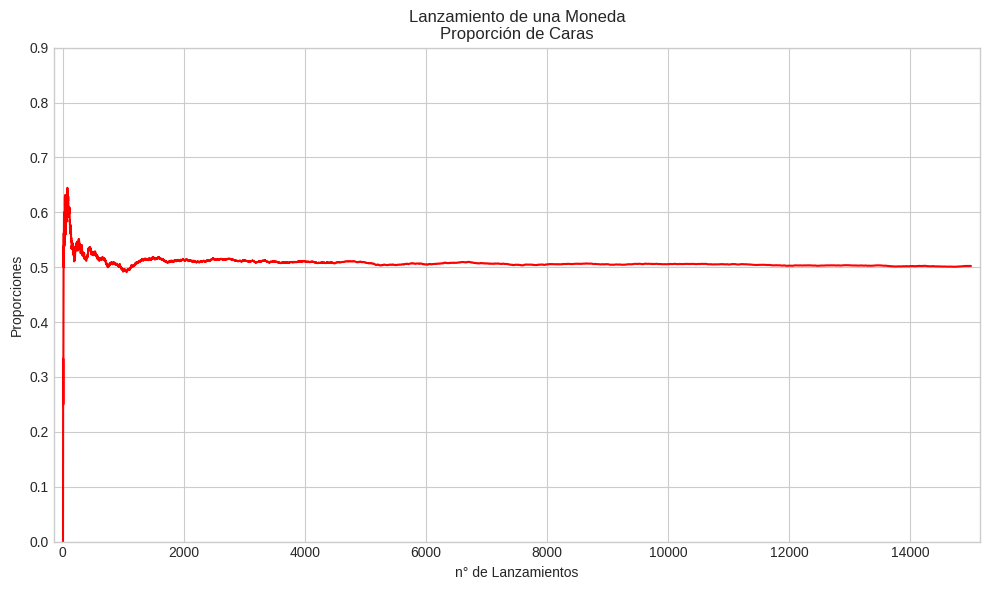

In [8]:
fig, ax = plt.subplots()

ax.plot(lanzamientos, vector_proporciones, 'r-')
plt.ylim(0,.9)
plt.title('Lanzamiento de una Moneda\nProporción de Caras')
plt.xlabel('n° de Lanzamientos')
plt.ylabel('Proporciones')
plt.margins(x=0.01)
plt.show()

## Teorema del Límite Central

El siguiente ejercicio busca comprobar que la distribucion de la media muestral estandarizada se aproxima a una distribución normal.

Si continuamos con el lanzamiento de una moneda, el promedio estandarizado de el conjunto de ensayos debe corresponder con:

$$\bar{Z}= \frac{(\bar{Y} - 0.5)}{{\frac{\sigma_Y}{{\sqrt{n}}}}} \sim \mathcal{N}(0, 1)$$

La siguiente lista presenta una secuencia de tamaños muestrales.

In [9]:
tm = [5, 20, 75, 100]

De seguidas se generan 4 conjuntos de muestras con cada uno de esos tamaños muestrales.

In [10]:
replicas = 10000

In [11]:
rng = np.random.default_rng(12271)

def genbin(n):
    aleats = np.empty(shape=(replicas, n))
    for r in range(replicas):
        aleats[r] = rng.binomial(1, 0.5, n)
    
    proms = aleats.mean(axis=1)
    medias_estandar = (proms - 0.5)/np.sqrt((0.5 * 0.5)/n)
    
    return medias_estandar

In [12]:
listas = list(map(genbin, tm))

len(listas)

4

In [13]:
from scipy.stats import norm

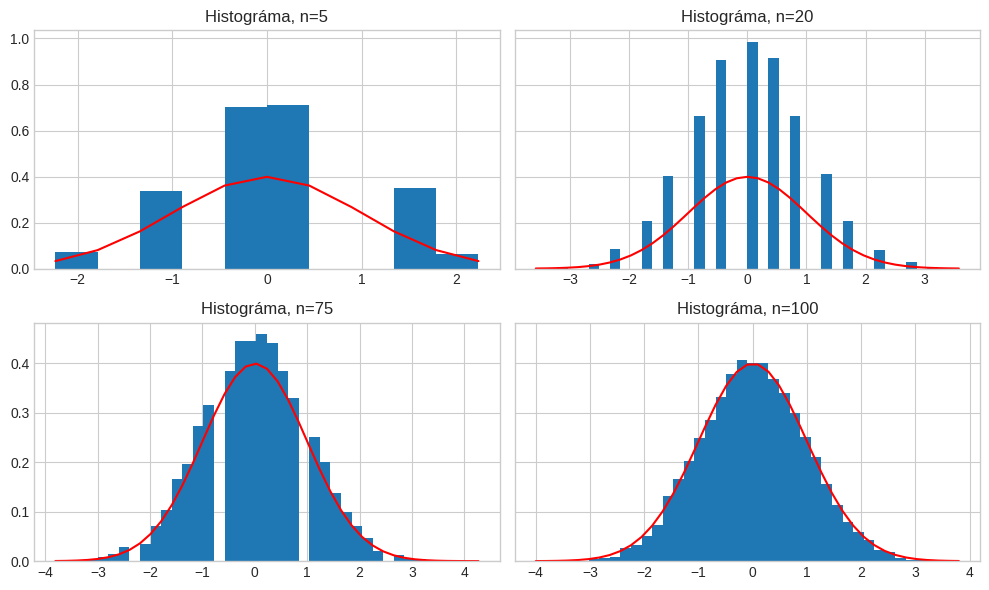

In [14]:
fig, ax = plt.subplots(2, 2, sharey='row')

c, bins, ign = ax[0, 0].hist(listas[0], density=True,
                       histtype='stepfilled',
                            )
ax[0,0].plot(bins, norm.pdf(bins), 'r-')
ax[0, 0].set_title('Histográma, n=5')

c, bins1, ign = ax[0, 1].hist(listas[1], density=True,
                       histtype='stepfilled',
                       bins=40)
ax[0,1].plot(bins1, norm.pdf(bins1), 'r-')
ax[0, 1].set_title('Histográma, n=20')

c, bins2, ign = ax[1, 0].hist(listas[2], density=True,
                       histtype='stepfilled',
                       bins=40)
ax[1, 0 ].plot(bins2, norm.pdf(bins2), 'r-')
ax[1, 0].set_title('Histográma, n=75')

c, bins3, ign =  ax[1, 1].hist(listas[3], density=True,
                       histtype='stepfilled',
                       bins=40)
ax[1, 1].plot(bins3, norm.pdf(bins3), 'r-')
ax[1, 1].set_title('Histográma, n=100')

plt.show()

La secuencia de histogramas pretende comprobar que, al incrementar el tamaño muestral, también aumenta la aproximación de la distribución media muestral estandarizada a una <i>normal</i>.

Ajustando convenientemente los valores de los <i>bins</i>, la aproximación para $n=100$ luce aceptable.